# Prompt para el diseño del parcial  

Dame un ejemplo de parcial 1 para realizar hoy 2 de septiembre en el curso de Vector Geometry And Linear Algebra para el programa de Ingeniería Agropecuaria según las temática a evaluar de acuerdo al cronograma para el curso que acabo de adjuntarte. 


Según el **cronograma que diseñaste para el curso Vector Geometry and Linear Algebra**, hoy **2 de septiembre (Clase 5)** corresponde a:

* **Tema**: Determinante y su interpretación geométrica.
* **Método de eliminación de Gauss para sistemas lineales.**
* **Evaluación programada**: **Quiz 2 (30 min)**.

El **Parcial 1** está programado para el **16 de septiembre (Clase 7)** y debe cubrir las **Unidades 1 y 2**, es decir:

1. **Vectores en el espacio**: operaciones, producto escalar, normas, distancias, producto vectorial.
2. **Matrices básicas**: definición, operaciones, interpretación geométrica, transformaciones lineales, determinante, método de Gauss.

---

### ✍️ Ejemplo de **Parcial 1** (2 horas)

**Curso:** Vector Geometry and Linear Algebra for Agricultural Engineering
**Fecha:** 16 de septiembre de 2025
**Duración:** 2 horas
**Temas evaluados:** Unidades 1 y 2

---


Página 194 del Grossmann  




#### Parte A. Vectores y operaciones (30 puntos)

1. (5 pts) Sea $\vec{u} = (3, -2, 1)$ y $\vec{v} = (1, 4, -2)$. Calcule:  
   a) $\vec{u} + \vec{v}$  
   b) $2\vec{u} - 3\vec{v}$  



2. (10 pts) Calcule el producto escalar $\vec{u} \cdot \vec{v}$ y el ángulo entre $\vec{u}$ y $\vec{v}$.



3. (10 pts) Calcule el producto vectorial $\vec{u} \times \vec{v}$ y verifique que es ortogonal tanto a $\vec{u}$ como a $\vec{v}$.


## Área de mejora 


4. (5 pts) Interprete geométricamente la **norma** de $\vec{u}$ en relación con una aplicación en Ingeniería Agropecuaria (ejemplo: distancia de un dron a un cultivo).

---



#### Parte B. Determinantes y aplicaciones (30 puntos)

5. (10 pts) Calcule el determinante de la matriz:

$$
A = \begin{pmatrix}
2 & 1 & -1 \\
0 & 3 & 2 \\
1 & -1 & 4
\end{pmatrix}
$$

Explique su interpretación geométrica en términos de **volumen**.


In [1]:
import numpy as np 

A = np.array([[2, 1, -1], [0, 3, 2], [1, -1, 4]])
A 

array([[ 2,  1, -1],
       [ 0,  3,  2],
       [ 1, -1,  4]])

In [2]:
np.linalg.det(A)

np.float64(33.0)

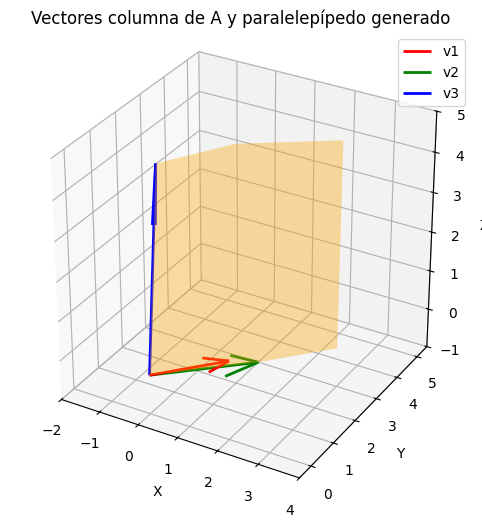

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

import matplotlib.pyplot as plt

# Los vectores columna de A
v1 = A[:,0]
v2 = A[:,1]
v3 = A[:,2]

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Origen
O = np.zeros(3)

# Dibujar los vectores
ax.quiver(*O, *v1, color='r', label='v1', linewidth=2)
ax.quiver(*O, *v2, color='g', label='v2', linewidth=2)
ax.quiver(*O, *v3, color='b', label='v3', linewidth=2)

# Generar los vértices del paralelepípedo
verts = np.array([
    O,
    v1,
    v2,
    v3,
    v1+v2,
    v1+v3,
    v2+v3,
    v1+v2+v3
])

# Caras del paralelepípedo (cada cara es un cuadrilátero)
faces = [
    [verts[0], verts[1], verts[4], verts[2]],
    [verts[0], verts[2], verts[6], verts[3]],
    [verts[0], verts[1], verts[5], verts[3]],
    [verts[7], verts[4], verts[1], verts[5]],
    [verts[7], verts[6], verts[2], verts[4]],
    [verts[7], verts[6], verts[3], verts[5]],
]

ax.add_collection3d(Poly3DCollection(faces, alpha=0.2, facecolor='orange'))

# Etiquetas y límites
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vectores columna de A y paralelepípedo generado')
ax.legend()
ax.set_box_aspect([1,1,1])

# Ajustar límites para mejor visualización
max_range = np.array([verts[:,0].max()-verts[:,0].min(), 
                      verts[:,1].max()-verts[:,1].min(), 
                      verts[:,2].max()-verts[:,2].min()]).max() / 2.0

mid_x = (verts[:,0].max()+verts[:,0].min()) * 0.5
mid_y = (verts[:,1].max()+verts[:,1].min()) * 0.5
mid_z = (verts[:,2].max()+verts[:,2].min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.show()

In [4]:
import plotly.graph_objects as go

# Vectores columna de A
v1 = A[:,0]
v2 = A[:,1]
v3 = A[:,2]
O = np.zeros(3)

# Vértices del paralelepípedo
verts = np.array([
    O,
    v1,
    v2,
    v3,
    v1+v2,
    v1+v3,
    v2+v3,
    v1+v2+v3
])

# Caras del paralelepípedo (índices de los vértices)
faces_idx = [
    [0, 1, 4, 2],
    [0, 2, 6, 3],
    [0, 1, 5, 3],
    [7, 4, 1, 5],
    [7, 6, 2, 4],
    [7, 6, 3, 5],
]

# Crear las caras como polígonos
face_traces = []
for idxs in faces_idx:
    x = verts[idxs, 0]
    y = verts[idxs, 1]
    z = verts[idxs, 2]
    face_traces.append(go.Mesh3d(
        x=x, y=y, z=z,
        color='orange',
        opacity=0.2,
        alphahull=0,
        showscale=False
    ))

# Trazas para los vectores
vector_traces = [
    go.Scatter3d(x=[O[0], v1[0]], y=[O[1], v1[1]], z=[O[2], v1[2]], mode='lines+markers', name='v1', line=dict(color='red', width=8)),
    go.Scatter3d(x=[O[0], v2[0]], y=[O[1], v2[1]], z=[O[2], v2[2]], mode='lines+markers', name='v2', line=dict(color='green', width=8)),
    go.Scatter3d(x=[O[0], v3[0]], y=[O[1], v3[1]], z=[O[2], v3[2]], mode='lines+markers', name='v3', line=dict(color='blue', width=8)),
]

# Layout
layout = go.Layout(
    title='Vectores columna de A y paralelepípedo generado (Plotly)',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        aspectmode='cube'
    ),
    showlegend=True
)

fig = go.Figure(data=face_traces + vector_traces, layout=layout)
fig.show()

In [5]:
# El volumen del paralelepípedo generado por los vectores columna de A es el valor absoluto del determinante de A
volumen = abs(np.linalg.det(A))
print(f"Volumen del sólido generado por los vectores columna de A: {volumen:.2f}")

Volumen del sólido generado por los vectores columna de A: 33.00


Conclusión: 

1. El determinante de una matriz $3 \times 3$ tiene interpretación geométrica como el volumen del sídode terminado por los vectores columna de la matriz


6. (10 pts) Resuelva el siguiente sistema lineal utilizando el método de **eliminación de Gauss**:

$$
\begin{cases}
x + 2y - z = 1 \\
2x - y + 3z = 5 \\
3x + y + 2z = 4
\end{cases}
$$



7. (10 pts) Una transformación lineal en el plano se representa por la matriz:

$$
T = \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
$$

a) Calcule \$\det(T)\$
b) Interprete geométricamente esta transformación (indique si preserva o invierte la orientación, y qué efecto produce sobre un cuadrado en el plano).

---



#### Parte C. Aplicación contextual (40 puntos)

8. (20 pts) Suponga que la posición de dos sensores climáticos en un cultivo de arroz están dados por los vectores:

$$
P = (3, 2, 1), \quad Q = (7, -1, 4)
$$

a) Calcule la distancia entre ambos sensores.
b) Determine la ecuación paramétrica de la recta que pasa por \$P\$ y \$Q\$.
c) Interprete cómo esta información podría ser usada en el diseño de una red de monitoreo agrícola.



9. (20 pts) Se modela el rendimiento de un cultivo con el sistema lineal:

$$
\begin{cases}
2x + y + z = 10 \\
x + 3y + 2z = 15 \\
x + y + 4z = 18
\end{cases}
$$

donde \$x, y, z\$ representan factores de suelo, agua y fertilización.
Resuelva el sistema con el método de Gauss y discuta el significado de la solución en el contexto agrícola.

---



# Guía didáctica — Resolución por eliminación de Gauss

Esta guía muestra paso a paso cómo resolver el sistema lineal que modela el rendimiento de un cultivo

$$
\begin{cases}
2x + y + z = 10 \\
 x + 3y + 2z = 15 \\
 x + y + 4z = 18
\end{cases}
$$

donde `x`, `y`, `z` representan factores de suelo, agua y fertilización. Incluye: explicación didáctica, eliminación de Gauss manual (con salida intermedia), verificación numérica, interpretaciones agrícolas, y visualizaciones con `matplotlib`, `seaborn`, `plotly` e `ipywidgets`.

---



## 1. Objetivos de la guía

1. Comprender y aplicar el método de eliminación de Gauss para resolver un sistema 3x3.
2. Visualizar la matriz de coeficientes y la solución con gráficos y tablas.
3. Interpretar la solución en términos agronómicos (significado de `x`, `y`, `z`).
4. Ofrecer una interfaz interactiva para experimentar con los términos independientes (RHS).

---


In [ ]:

# %%
# Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import display, Markdown
import ipywidgets as widgets

# Ajustes estéticos mínimos
plt.rcParams['figure.figsize'] = (7,4)

# %% [markdown]
## 2. Planteamiento matricial

El sistema se puede escribir como \(A\mathbf{v} = \mathbf{b}\), con:

\[ A = \begin{pmatrix} 2 & 1 & 1 \\ 1 & 3 & 2 \\ 1 & 1 & 4 \end{pmatrix},\quad \mathbf{v} = \begin{pmatrix} x \\ y \\ z \end{pmatrix},\quad \mathbf{b} = \begin{pmatrix} 10 \\ 15 \\ 18 \end{pmatrix}. \]

---

# %% [markdown]
## 3. Eliminación de Gauss — solución manual con pasos (implementación)

A continuación hay una función que realiza eliminación de Gauss (sin pivoteo por fila explícito, pero con manejo de ceros) y devuelve la solución junto con las matrices intermedias para mostrar en clase.

# %%
def gaussian_elimination_with_steps(A, b, tol=1e-12):
    """Realiza eliminación de Gauss simple (no parcial) devolviendo pasos intermedios.
    A: numpy array (n,n), b: numpy array (n,)
    """
    A = A.astype(float).copy()
    b = b.astype(float).copy()
    n = A.shape[0]
    steps = []

    # Combinar A y b en matriz aumentada
    Aug = np.hstack([A, b.reshape(-1,1)])
    steps.append(('Matriz aumentada inicial', Aug.copy()))

    # Eliminación hacia adelante
    for k in range(n-1):
        # Pivoteo parcial (intercambiar si pivote cerca de cero)
        if abs(Aug[k,k]) < tol:
            # buscar fila con pivot no nulo
            for i in range(k+1, n):
                if abs(Aug[i,k]) > tol:
                    Aug[[k,i]] = Aug[[i,k]]
                    steps.append((f'Intercambiar fila {k} con fila {i} (pivote)', Aug.copy()))
                    break
        pivot = Aug[k,k]
        if abs(pivot) < tol:
            raise ValueError('Pivote nulo detectado; sistema singular o requiere pivoteo más avanzado')
        for i in range(k+1, n):
            factor = Aug[i,k] / pivot
            Aug[i,k:] = Aug[i,k:] - factor * Aug[k,k:]
            steps.append((f'Eliminando columna {k}, fila {i} (factor {factor:.4f})', Aug.copy()))

    # Sustitución hacia atrás
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        s = Aug[i,i+1:n] @ x[i+1:n]
        denom = Aug[i,i]
        if abs(denom) < tol:
            raise ValueError('Denominador cero en sustitución hacia atrás')
        x[i] = (Aug[i,-1] - s) / denom
    steps.append(('Solución (vector x)', x.copy()))
    return x, steps

# Datos del problema
A = np.array([[2,1,1],[1,3,2],[1,1,4]])
b = np.array([10,15,18])

x_gauss, steps = gaussian_elimination_with_steps(A, b)

# Mostrar pasos clave en formato legible
for title, mat in steps:
    display(Markdown(f'**{title}**'))
    if mat.ndim == 1 or mat.shape[0] == 1:
        display(mat)
    else:
        df = pd.DataFrame(mat)
        display(df.round(4))

# Valor final de x
display(Markdown(f"**Solución encontrada (x, y, z):** {np.round(x_gauss,4)}"))

# %% [markdown]
## 4. Verificación con `numpy.linalg.solve`

# %%
x_np = np.linalg.solve(A, b)
assert np.allclose(x_np, x_gauss)

# Mostrar en tabla
sol_df = pd.DataFrame({
    'Factor': ['Suelo (x)', 'Agua (y)', 'Fertilización (z)'],
    'Valor': x_gauss
})

from IPython.display import display

display(Markdown('### Tabla de solución'))
display(sol_df)

# %% [markdown]
## 5. Interpretación agronómica

# %%
interpretation = (
    "La solución \(x, y, z\) indica cómo se combinan los factores (suelo, agua, fertilización) "
    "para reproducir el rendimiento representado por el lado derecho. Valores positivos sugieren una "
    "contribución directa al rendimiento. En clase discuta: ¿qué significan magnitudes mayores? "
    "¿Podrían interpretarse como unidades normalizadas o índices relativos?"
)

display(Markdown('### Interpretación (breve)'))
display(Markdown(interpretation))

# %% [markdown]
## 6. Visualizaciones

# 6.1 Heatmap de la matriz de coeficientes (Seaborn)
# %%
plt.figure()
sns.heatmap(A, annot=True, fmt='.0f', cmap='viridis', cbar=True, xticklabels=['x','y','z'], yticklabels=['eq1','eq2','eq3'])
plt.title('Heatmap de la matriz de coeficientes A')
plt.show()

# 6.2 Gráfico de barras de los valores de x,y,z (Matplotlib)
# %%
plt.figure()
plt.bar(sol_df['Factor'], sol_df['Valor'])
plt.ylabel('Valor (unidades relativas)')
plt.title('Contribución estimada de cada factor')
plt.show()

# 6.3 Gráfico interactivo con Plotly
# %%
fig = go.Figure(data=[go.Bar(x=sol_df['Factor'], y=sol_df['Valor'])])
fig.update_layout(title='Contribución por factor (Plotly interactivo)', yaxis_title='Valor')
fig.show()

# 6.4 Tabla visual con Plotly
# %%
fig_table = go.Figure(data=[go.Table(
    header=dict(values=list(sol_df.columns)),
    cells=dict(values=[sol_df['Factor'], sol_df['Valor'].round(4)])
)])
fig_table.update_layout(title='Tabla de solución')
fig_table.show()

# %% [markdown]
## 7. Interactividad: cambiar el vector b (rhs) con ipywidgets

# %%
# Widgets para cambiar RHS y recalcular
b1 = widgets.FloatSlider(value=10, min=0, max=30, step=0.5, description='b1 (eq1)')
b2 = widgets.FloatSlider(value=15, min=0, max=30, step=0.5, description='b2 (eq2)')
b3 = widgets.FloatSlider(value=18, min=0, max=30, step=0.5, description='b3 (eq3)')

out = widgets.Output()

@widgets.interact(b1=b1, b2=b2, b3=b3)
def update(b1, b2, b3):
    with out:
        out.clear_output()
        b_new = np.array([b1, b2, b3])
        try:
            x_new = np.linalg.solve(A, b_new)
        except Exception as e:
            display(Markdown(f'**Error**: {e}'))
            return
        df_new = pd.DataFrame({
            'Factor': ['Suelo (x)', 'Agua (y)', 'Fertilización (z)'],
            'Valor': x_new
        })
        display(Markdown('### Solución con RHS ajustado'))
        display(df_new.round(4))
        # Mostrar gráfico simple
        fig = go.Figure(data=[go.Bar(x=df_new['Factor'], y=df_new['Valor'])])
        fig.update_layout(title='Contribución por factor (RHS ajustado)', yaxis_title='Valor')
        fig.show()

display(out)

# %% [markdown]
## 8. Actividades sugeridas para la clase

1. Pida a los estudiantes resolver el sistema a mano usando eliminación de Gauss y comparar con el código.
2. Pregunte cómo cambiaría la solución si aumentamos b3 (término de la tercera ecuación) — usar los `ipywidgets`.
3. Discuta límites físicos: ¿qué significa un valor negativo para `x` o `z` en términos agronómicos?
4. Proponga medir los factores en unidades reales (pH, mm agua, kg/ha fertilizante) y escalar el modelo.

---

# %% [markdown]
## 9. Conclusión didáctica

La eliminación de Gauss permite resolver sistemas que describen relaciones lineales entre factores agronómicos. Las visualizaciones ayudan a interpretar y comunicar resultados. Las herramientas interactivas facilitan la experimentación en clase.


# %% [markdown]
*Fin de la guía — puede ejecutar todas las celdas en un Jupyter Notebook (o en Google Colab instalando las librerías necesarias).*



**Total: 100 puntos**

* Parte A: 30 pts
* Parte B: 30 pts
* Parte C: 40 pts

---

¿Quieres que te lo prepare también en **formato PDF con encabezado institucional** para que lo uses directamente hoy en clase?
